# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies_train.csv")
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies_test.csv")
submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/submission.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [8]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [9]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [10]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [11]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


## 2) 데이터 요약


In [12]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## 3) 데이터의 요약통계량 확인

In [15]:
pd.options.display.float_format = '{:.1f}'.format

In [16]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [17]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.0,107.0,243.0,243.0,243.0
mean,109.8,891669.5,0.9,159.3,3.5
std,124.0,1217341.5,1.2,163.0,2.1
min,40.0,34.0,0.0,0.0,0.0
25%,91.0,62502.0,0.0,18.0,2.0
50%,104.0,493120.0,0.0,105.0,3.0
75%,114.5,1080849.6,1.0,282.0,4.0
max,2015.0,6173099.5,6.0,776.0,16.0


## 4) 결측치 확인 및 데이터 전처리


In [18]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [19]:
test.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,136
dir_prev_num,0
num_staff,0


- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [20]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [21]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5


In [22]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [23]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [24]:
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

## 5) 데이터 시각화 및 분석

###(1) 개봉일(release_time: object->datetime으로 바꾸기)에 따른 관객 수(box_off_num: int_64) 차이

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

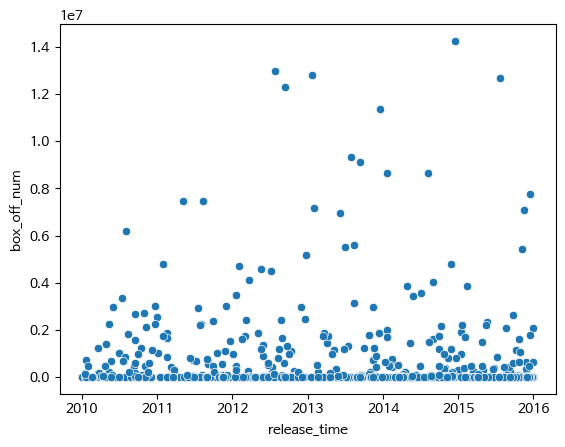

In [26]:
sns.scatterplot(x='release_time',y='box_off_num',data=train)
plt.show()

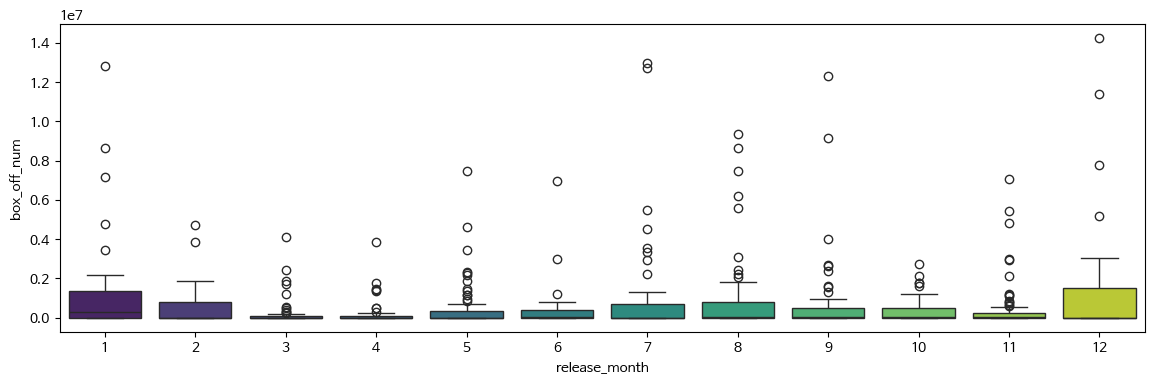

In [31]:
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

plt.figure(figsize=(14, 4))
sns.boxplot(x='release_month', y='box_off_num',data=train,palette='viridis')
plt.show()

###(2) 스텝수(num_staff: int64)에 따른 관객 수(box_off_num:int64)

영화 제작 시 인력이 많이 투입될수록 더 많은 관객 수가 산출되는지 알아보기 위해 분석을 실행한다.

영화 제작에 투입되는 인력의 규모와 관객 수 사이의 관계를 분석하는 것은 매우 중요하다. 투입되는 인력이 많을수록 더 많은 관객이 영화를 관람하는지, 즉, 투입과 산출이 비례 관계에 있는지를 파악하기 위함이다.

만약 인력 투입이 관객 수 증가에 직접적으로 비례하지 않는다면, 이는 무작정 많은 인력을 투입하는 것이 비효율적임을 의미한다. 따라서 본 분석을 통해 흥행을 극대화하면서도 효율적인 인력 규모가 어느 정도인지 파악하는 것이 가능하다. 이는 영화 제작사가 제작 비용을 최적화하는 데 중요한 지표가 될 것이다.

####(a) 스캐터 플롯

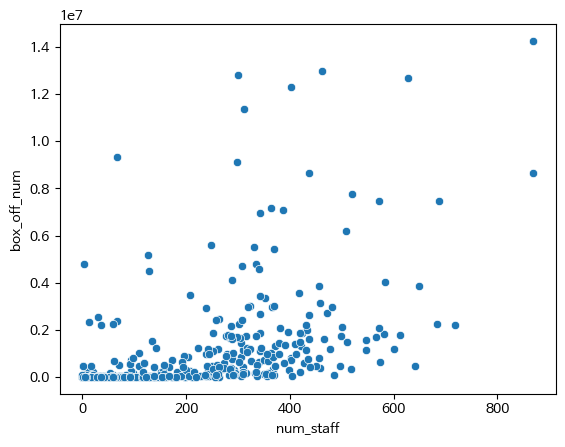

In [46]:
sns.scatterplot(x='num_staff',y='box_off_num',data=train)
plt.show()

이 그래프에 따르면, 제작 인력 규모가 200명에서 500명 사이인 영화들이 다수 존재함이 확인된다.

그럼에도 불구하고, 500명 이상의 인력이 투입된 영화 중에도 높은 관객 수를 기록한 작품들이 상당수 있다. 따라서, 인력 규모에 따라 흥행 성과에 어떤 차이가 있는지 심층적으로 분석하기 위해, 투입된 인력의 수를 일정한 구간으로 나누어 바이올린 플롯으로 시각화할 필요가 있다.

####(b) 바이올린 플롯

In [53]:
train['num_staff'].max()

869

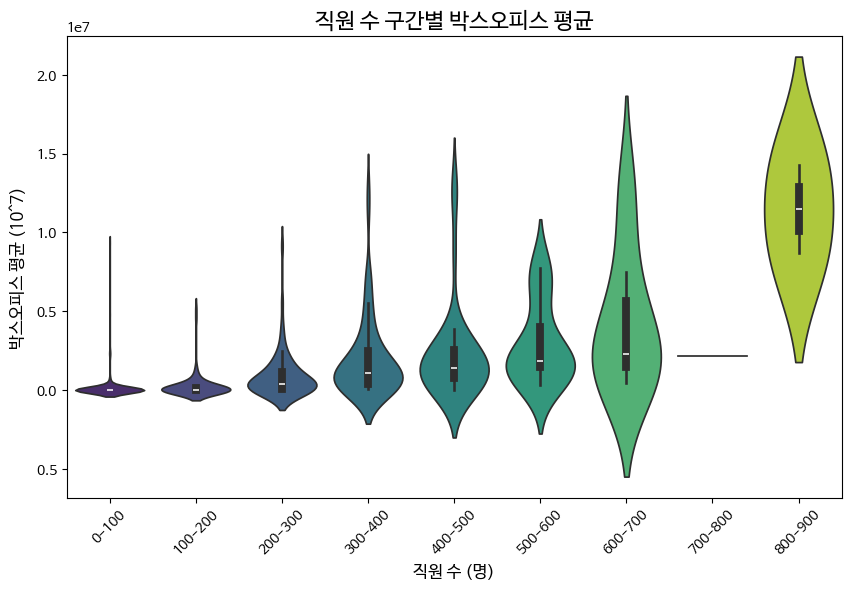

In [55]:
# num_staff 구간 정의
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# 각 구간의 라벨 정의
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900']


# num_staff 열을 구간으로 나누어 새로운 열('staff_bin') 생성
# right=False: 구간을 왼쪽 경계는 포함하고 오른쪽 경계는 포함하지 않도록 함
# include_lowest=True: 가장 낮은 값(최소값)이 첫 번째 구간에 포함되도록 함
train['staff_bin'] = pd.cut(train['num_staff'], bins=bins, labels=labels, right=False, include_lowest=True)

# 계산된 평균을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.violinplot(x='staff_bin', y='box_off_num', data=train, palette='viridis')

# 그래프 제목 및 라벨 설정
plt.title('직원 수 구간별 박스오피스 평균', fontsize=16)
plt.xlabel('직원 수 (명)', fontsize=12)
plt.ylabel('박스오피스 평균 (10^7)', fontsize=12)
plt.xticks(rotation=45) # x축 라벨이 겹치지 않도록 회전

# 그래프 표시
plt.show()

그래프를 보면, 스태프 수가 증가할수록 바이올린 플롯의 높이가 증가하고, 폭도 넓어지는 경향이 있다. 스태프 수가 많을수록 관객 수의 평균이 높아지지만, 편차도 커진다는 것을 의미한다.

* 0-300명: 폭이 매우 좁고 아래쪽에 몰려 있다. 이는 적은 스태프를 둔 영화들이 대부분 낮은 관객 수를 기록했음을 보여준다. 데이터가 중앙값 근처에 밀집되어 있어 흥행 편차가 크지 않다.

* 300-600명: 관객 수가 높아지고, 바이올린의 모양도 더 넓어졌다. 이는 중간 규모의 스태프 수를 가진 영화들이 다양한 관객 수를 냈음을 보여준다.

* 600-700명: 위로 가장 길게 늘어져 있다. 이는 흥행에 크게 성공한 소수의 영화들이 존재한다는 것을 보여준다.

* 700-800명: 이 구간에는 데이터가 없다.

* 800-900명: 관객 수 최댓값이 가장 높고, 바이올린의 폭이 넓어 데이터의 분산이 가장 큽다. 이는 스태프 수가 많은 영화일수록 흥행 성패가 극명하게 갈린다는 것을 보여준다.

=> 따라서 스태프의 수가 많아질수록 평균 관객 수가 증가하긴 하지만, 흥행 성적의 양극화 현상도 심하다.

###(3) 배급사(distributor: object)와 장르(genre: object)의 상관관계
: 서브플롯 & 바플롯

영화 제작시에 각 영화 장르에 따라 어떤 배급사를 선택하는 것이 유리한지 알아보기 위해 분석을 실시한다.

영화 제작 시 각 장르에 맞는 배급사를 선택하는 것은 흥행에 매우 중요하다. 특정 장르에 대한 경험이 풍부한 배급사는 해당 장르의 관객을 잘 이해하고 있어, 효과적인 마케팅 전략을 수립하고 영화를 성공적으로 배급할 가능성이 높기 때문이다.

영화 제작사는 이 분석을 통해 제작하는 영화의 장르에 따라 가장 적합한 배급 파트너를 찾을 수 있다.

마찬가지로, 배급사 측에서도 자신들의 주요 배급 장르에 부합하는 영화를 제작하는 제작사에게 먼저 배급을 제안할 수 있어, 서로에게 긍정적인 시너지를 창출할 수 있다.

In [42]:
#unique(): 데이터프레임의 특정 열에서 중복되지 않는 유일한 값들만 추출
distributors = train['distributor'].unique()
n_distributors = len(distributors)
print(n_distributors)

top10_distributors = train['distributor'].value_counts().head(10).index
print(top10_distributors)


169
Index(['CJ 엔터테인먼트', '롯데엔터테인먼트', '(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스', '인디스토리',
       '골든타이드픽처스', '(주) 케이알씨지', '시너지', '(주)키노아이'],
      dtype='object', name='distributor')


10개의 주요배급사들의 배급 현황을 파악할 것이다.

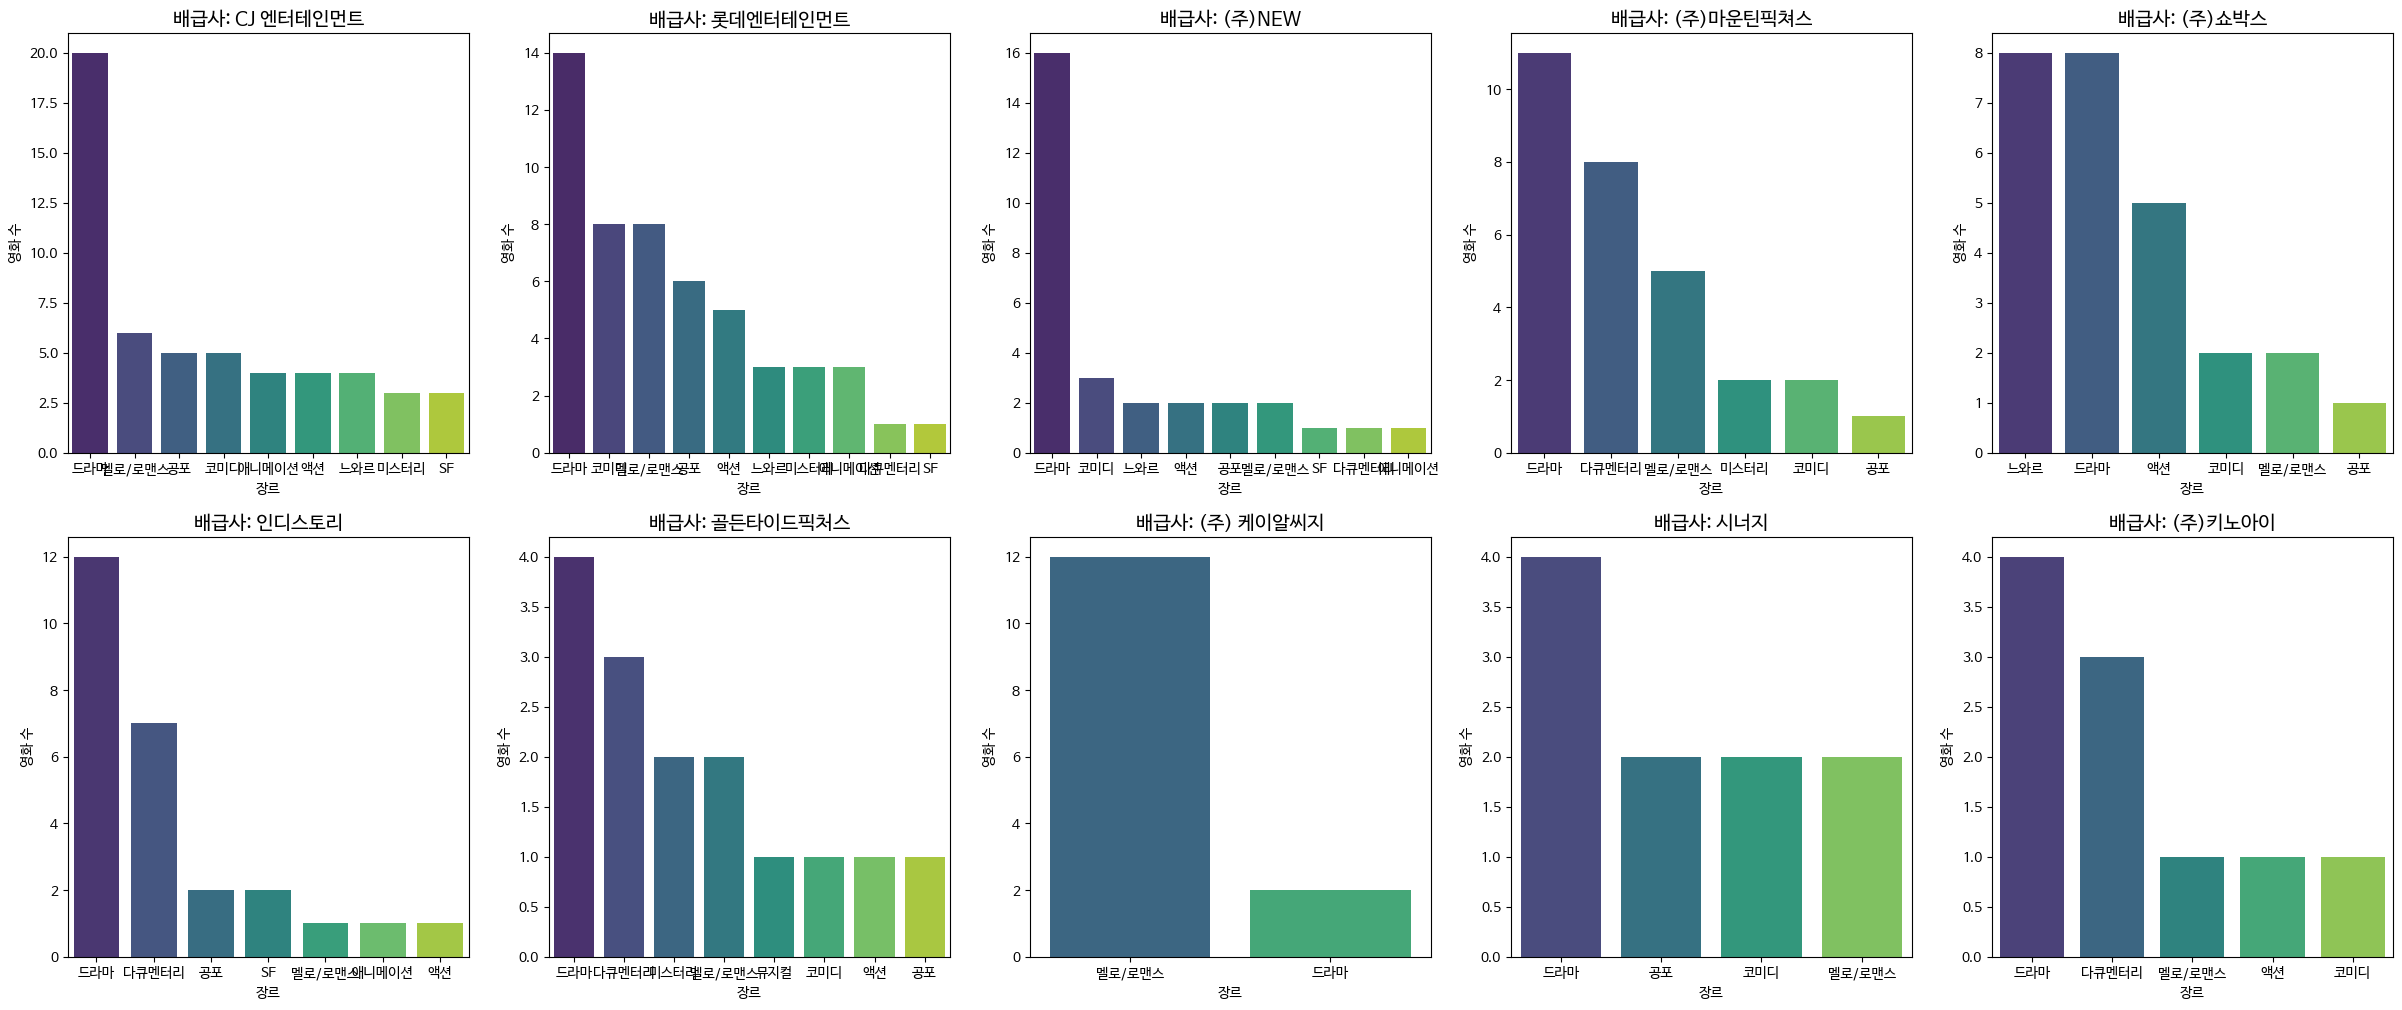

In [43]:
fig, axes = plt.subplots(2, 5, figsize=(30, 12))

#다차원 배열을 1차원 배열로 만들어줌: [[ax1, ax2, ax3, ax4, ax5], [ax6, ax7, ax8, ax9, ax10]] => [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
axes = axes.flatten()

#enumerate(): top10_distributors 목록의 요소들을 인덱스와 함께 순회하게 해주는 파이썬 내장 함수
for i, dist in enumerate(top10_distributors):

    # 해당 배급사의 데이터만 필터링
    dist_data = train[train['distributor'] == dist]

    # 장르별 빈도수 계산
    genre_counts = dist_data['genre'].value_counts()

    # 막대 그래프 그리기 (ax=axes[i]: 그래프를 그릴 서브플롯의 위치를 지정함)
    sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[i],palette='viridis')

    # 그래프 제목 및 라벨 설정
    axes[i].set_title('배급사: {}'.format(dist), fontsize=14)
    axes[i].set_xlabel('장르')
    axes[i].set_ylabel('영화 수')

# 전체 그래프 레이아웃 조절
plt.show()

* CJ 엔터테이먼트, 롯데엔터테이먼트,(주)NEW, 마운틴픽쳐스, 인디스토리, 골든타이드픽쳐스, 시너지,(주)키노아이의 그래프에서 드라마 장르의 영화 수가 가장 많게 나타난다. 이는 드라마 장르가 가장 보편적이고, 이들 배급사의 핵심 장르임을 보여준다.

* 특이하게 (주)쇼박스는 전체 배급 영화 중 느와르 영화가 상당 수를 차지한다.

* CJ 엔터테이먼트, 롯데엔터테이먼트,(주)NEW는 다양한 장르의 영화를 배급하고 있다.